Homework1A

Name: Akanksha Singh
Id: 19745

Below are detailed steps along with Python code to perform exploratory analysis, visual inspection, and basic kNN classification on the Iris dataset.


***Part1***:
Exploratory Analysis on Iris Data:

Steps:
**Load the Iris Dataset:**

Import necessary libraries and load the Iris dataset.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


**Basic Dataset Exploration:**

Check the first few rows and data types.

In [2]:
print(df.head())
print(df.info())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

**Statistical Analysis:**

Calculate mean, median, and standard deviation.

In [3]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


**Distribution Analysis:**

Create histograms for each feature.

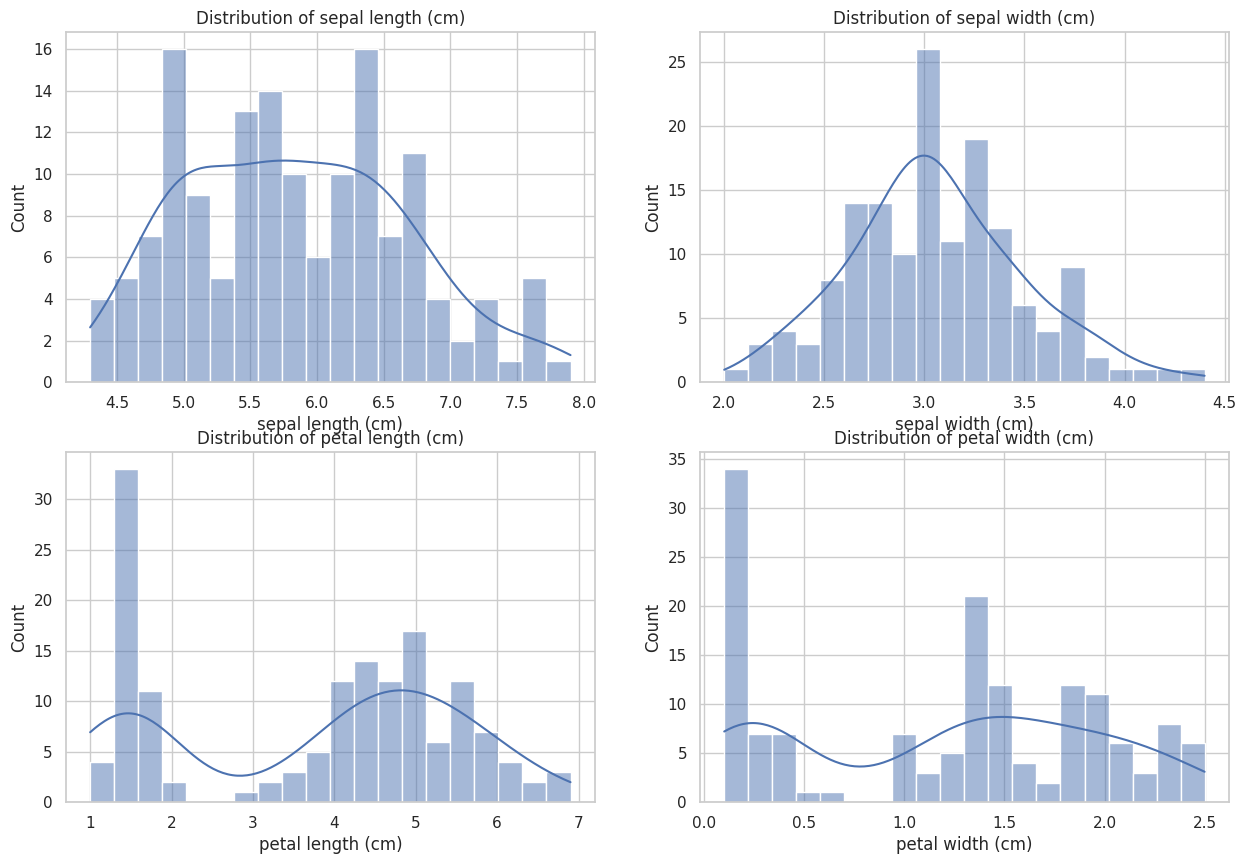

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')

plt.show()


Additional Comments:
The dataset is loaded and comprises four features: sepal length, sepal width, petal length, and petal width.
The data is clean, with no missing values, and features are numerical.
Statistical analysis reveals insights into the central tendencies and spread of each feature.
Distribution analysis visually represents the spread and shape of feature values.

***Part2***:
Visual Inspection of Features and Output Samples:

Steps:
**Feature Visualization:**

Create pair plots to visualize relationships between pairs of features.

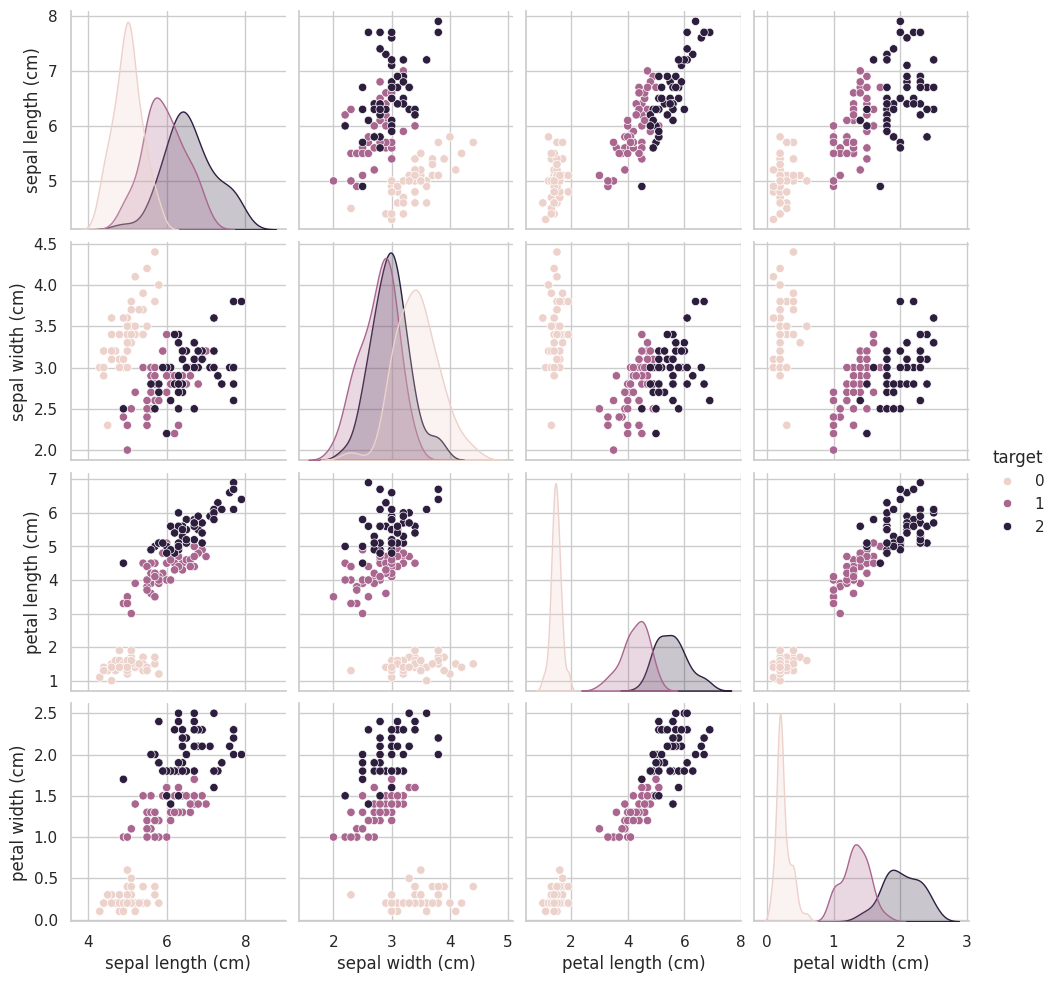

In [5]:
sns.pairplot(df, hue='target')
plt.show()


**Output Samples Visualization**:

Plot the distribution of output classes.

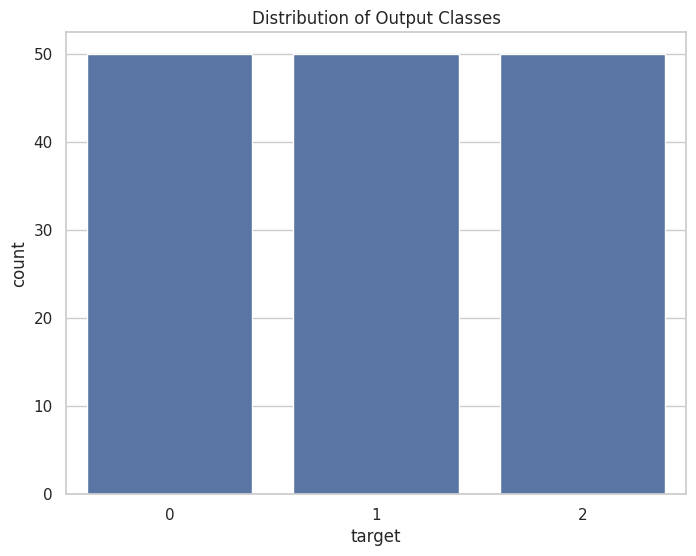

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Output Classes')
plt.show()


Additional Comments:
Pair plots showcase relationships between different pairs of features, aiding in feature interpretation.
The distribution plot illustrates the balance of output classes; all three classes are well-represented.

***Part3:***
Basic kNN Classification:

Steps:
**Data Preparation:**

Split the dataset into features (X) and target variable (y).

In [7]:
X = df.iloc[:, :-1]
y = df['target']


**Train-Test Split:**

Split the dataset into training and testing sets.

In [8]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Scaling:**

Standardize or normalize the feature values.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**kNN Model Training**:

Import the kNN classifier and train the model.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k = 3  # Choose an appropriate value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

**Prediction and Evaluation:**

Make predictions on the test set and evaluate the model's performance.

In [11]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Additional Comments:
The data is split into training and testing sets for model evaluation.
Features are scaled to ensure equal weight in the distance calculation.
The kNN model is trained, and its accuracy is evaluated on the test set.
The classification report provides insights into precision, recall, and F1-score for each class.